In [69]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [70]:
df=pd.read_csv("MCI_data2014_2019_multiclass.csv")

In [71]:
df.head()

occurrenceyear  occurrenceday  occurrencedayofyear  occurrencehour  Hood_ID       Long        Lat  Employment rate  Unemployment rate  Unsuitable rate  population  Postsecondary  Postsecondary rate  income  density  target  month  day  premise_type
0            2014             24                   83               1      132 -79.199081  43.800281             55.5               10.5             17.3       43794          16960            0.387268   29573     4948       0      0    0             0
1            2014             27                  270              16       76 -79.386383  43.662472             56.2               10.2             12.6       25797          17505            0.678567   56526    14097       1      1    1             1
2            2014             24                   83               6        1 -79.612595  43.720406             58.0                9.6             17.4       33312          13425            0.403008   31771     1117       1      0    0             0
3            2014             24                   83              15       47 -79.349121  43.782772             55.1                9.6             15.8       27051          15035            0.555802   37379     6441       1      0    0             2
4            2014              3                  123               2       90 -79.458778  43.664490             69.9                5.6              6.7       14366           7790            0.542253   49709     5442       2      2    1             0

In [72]:
df.shape

(205321, 19)

In [73]:
df['target'].value_counts()

0    110609
1     43214
4     23330
2     21500
3      6668
Name: target, dtype: int64

In [74]:
X= df.drop(['target'],axis = 1)

In [75]:
y = df['target']

In [76]:
type(X)

pandas.core.frame.DataFrame

### Using SMOTE to balance the dataset

In [77]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [78]:
smote = SMOTE('all')

C:\Users\ketao\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [79]:
X_sm,y_sm = smote.fit_sample(X, y)

In [80]:
type(X_sm)

pandas.core.frame.DataFrame

In [81]:
unique, counts = np.unique(y_sm, return_counts=True)
dict(zip(unique, counts))

{0: 110609, 1: 110609, 2: 110609, 3: 110609, 4: 110609}

### train test dataset split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)

### Random Forest

In [83]:
X = X_train
y = y_train

In [84]:
model = RandomForestClassifier() # XGBClassifier()
model.fit(X, y)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)


Variable  Importance
5                  Long    0.130183
2   occurrencedayofyear    0.128208
6                   Lat    0.127950
1         occurrenceday    0.103347
3        occurrencehour    0.098030
17         premise_type    0.085107
15                month    0.077065
16                  day    0.068593
0        occurrenceyear    0.062272
14              density    0.017185
4               Hood_ID    0.015886
12   Postsecondary rate    0.014035
13               income    0.012812
9       Unsuitable rate    0.012307
7       Employment rate    0.012188
11        Postsecondary    0.011826
8     Unemployment rate    0.011612
10           population    0.011393

In [85]:
import lime
import lime.lime_tabular

In [86]:
predict_fn_rf = lambda x: random_forest.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=[0,1,2,3,4],kernel_width=5)

In [104]:
def wrapped_fn(x):
  p = model.predict(x).reshape(-1, 1)
  return np.hstack((1-p, p))

In [127]:
exp = explainer.explain_instance(X_test.iloc[0], wrapped_fn)
#exp.as_pyplot_figure()

In [128]:
y_test.iloc[0]

1

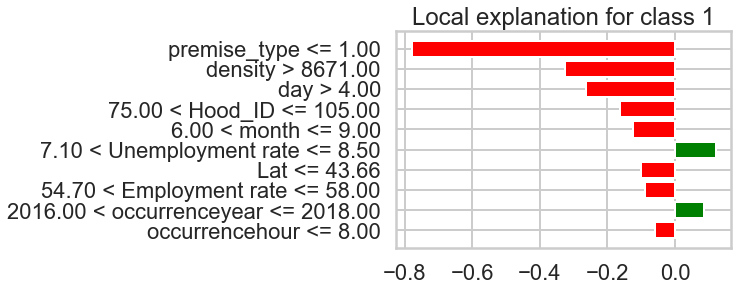

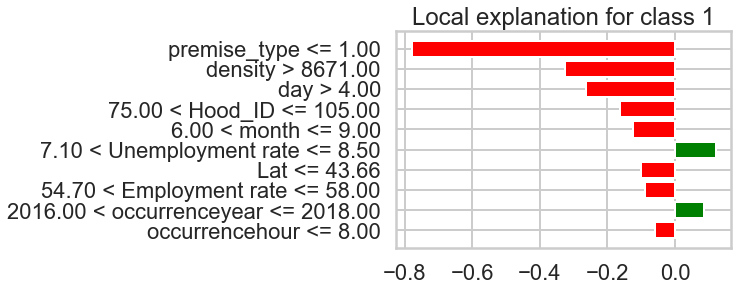

In [129]:
exp.as_pyplot_figure()

In [130]:
pd.DataFrame(exp.as_list())

0         1
0                 premise_type <= 1.00 -0.779756
1                    density > 8671.00 -0.326794
2                           day > 4.00 -0.263901
3            75.00 < Hood_ID <= 105.00 -0.161476
4                 6.00 < month <= 9.00 -0.124533
5     7.10 < Unemployment rate <= 8.50  0.121525
6                         Lat <= 43.66 -0.099582
7     54.70 < Employment rate <= 58.00 -0.089676
8  2016.00 < occurrenceyear <= 2018.00  0.085136
9               occurrencehour <= 8.00 -0.059808

In [131]:
exp.show_in_notebook(show_table=True, show_all=False)

In [123]:
y_test.iloc[1010]

4

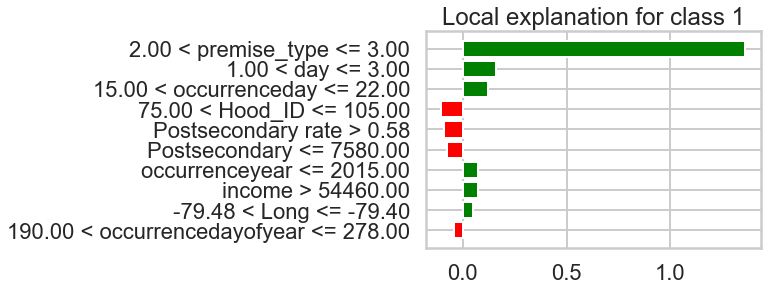

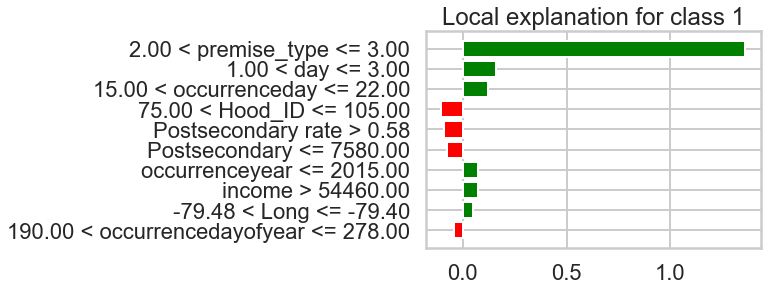

In [124]:
exp = explainer.explain_instance(X_test.iloc[1010], wrapped_fn)
exp.as_pyplot_figure()

In [125]:
pd.DataFrame(exp.as_list())


0         1
0             2.00 < premise_type <= 3.00  1.362038
1                      1.00 < day <= 3.00  0.158035
2          15.00 < occurrenceday <= 22.00  0.121427
3               75.00 < Hood_ID <= 105.00 -0.105414
4               Postsecondary rate > 0.58 -0.091476
5                Postsecondary <= 7580.00 -0.077717
6               occurrenceyear <= 2015.00  0.075060
7                       income > 54460.00  0.073104
8                 -79.48 < Long <= -79.40  0.050595
9  190.00 < occurrencedayofyear <= 278.00 -0.043383

In [126]:
exp.show_in_notebook(show_table=True, show_all=False)

In [119]:
y_test.iloc[5001]

3

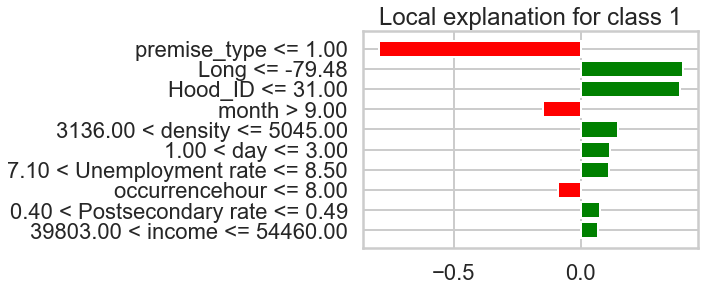

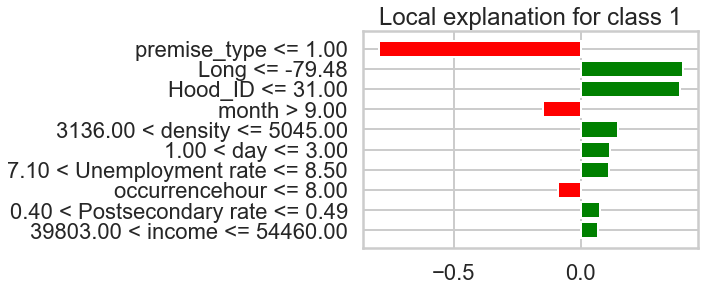

In [120]:
exp = explainer.explain_instance(X_test.iloc[5001], wrapped_fn)
exp.as_pyplot_figure()

In [121]:
pd.DataFrame(exp.as_list())

0         1
0               premise_type <= 1.00 -0.797481
1                     Long <= -79.48  0.402411
2                   Hood_ID <= 31.00  0.390396
3                       month > 9.00 -0.147182
4       3136.00 < density <= 5045.00  0.145549
5                 1.00 < day <= 3.00  0.115995
6   7.10 < Unemployment rate <= 8.50  0.109393
7             occurrencehour <= 8.00 -0.089462
8  0.40 < Postsecondary rate <= 0.49  0.075298
9      39803.00 < income <= 54460.00  0.068332

In [122]:
exp.show_in_notebook(show_table=True, show_all=False)